In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data

_data = pd.read_csv(r'C:\Users\fifok\Downloads\train_data.csv')

##### Proceed to cleaning the data

- CHeck for High and Low cardinality
- Check for columns with >50% null cells
- Check for Leakages
- Check for Multicollinearity
- Check for outliers

In [3]:
_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   int64  
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1084 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          83 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   int64  
 17  OverallCond    1314 non-null   int64  
 18  YearBuil

In [5]:
#Removing the columns with too many Null values

null_cols = ['Alley','FireplaceQu','PoolQC','MiscFeature','Fence']
_data.drop(columns = null_cols, inplace = True)

In [6]:
#Remove features that would constitute leakage
leak_cols = ['MiscVal','SaleType','SaleCondition']
_data.drop(columns = leak_cols, inplace = True)

In [7]:
#remove a column that cannot be reproduced in real time
_data.drop(columns = 'YrSold', inplace = True)

In [8]:
#remove overallcond and overall quality of the house, because it sort of tell the model how to value the house
_data.drop(columns = ['OverallQual','OverallCond'], inplace = True)

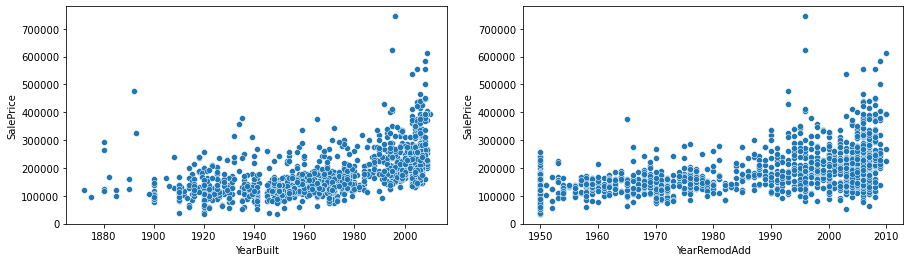

In [9]:
#checking the effect of year built and year RemoAdd
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
sns.scatterplot(x = _data['YearBuilt'], y = _data['SalePrice']);

plt.subplot(1,2,2)
sns.scatterplot(x = _data['YearRemodAdd'], y = _data['SalePrice']);

In [10]:
#remove year built and year RemoAdd because of weak correlation
_data.drop(columns = ['YearBuilt','YearRemodAdd'], inplace = True)

In [11]:
#MSsubclass is a categorical variable and not a numerical variable, convert to categorical
_data['MSSubClass'] = _data['MSSubClass'].astype(str)

In [12]:
cor = _data.select_dtypes('number').corr()

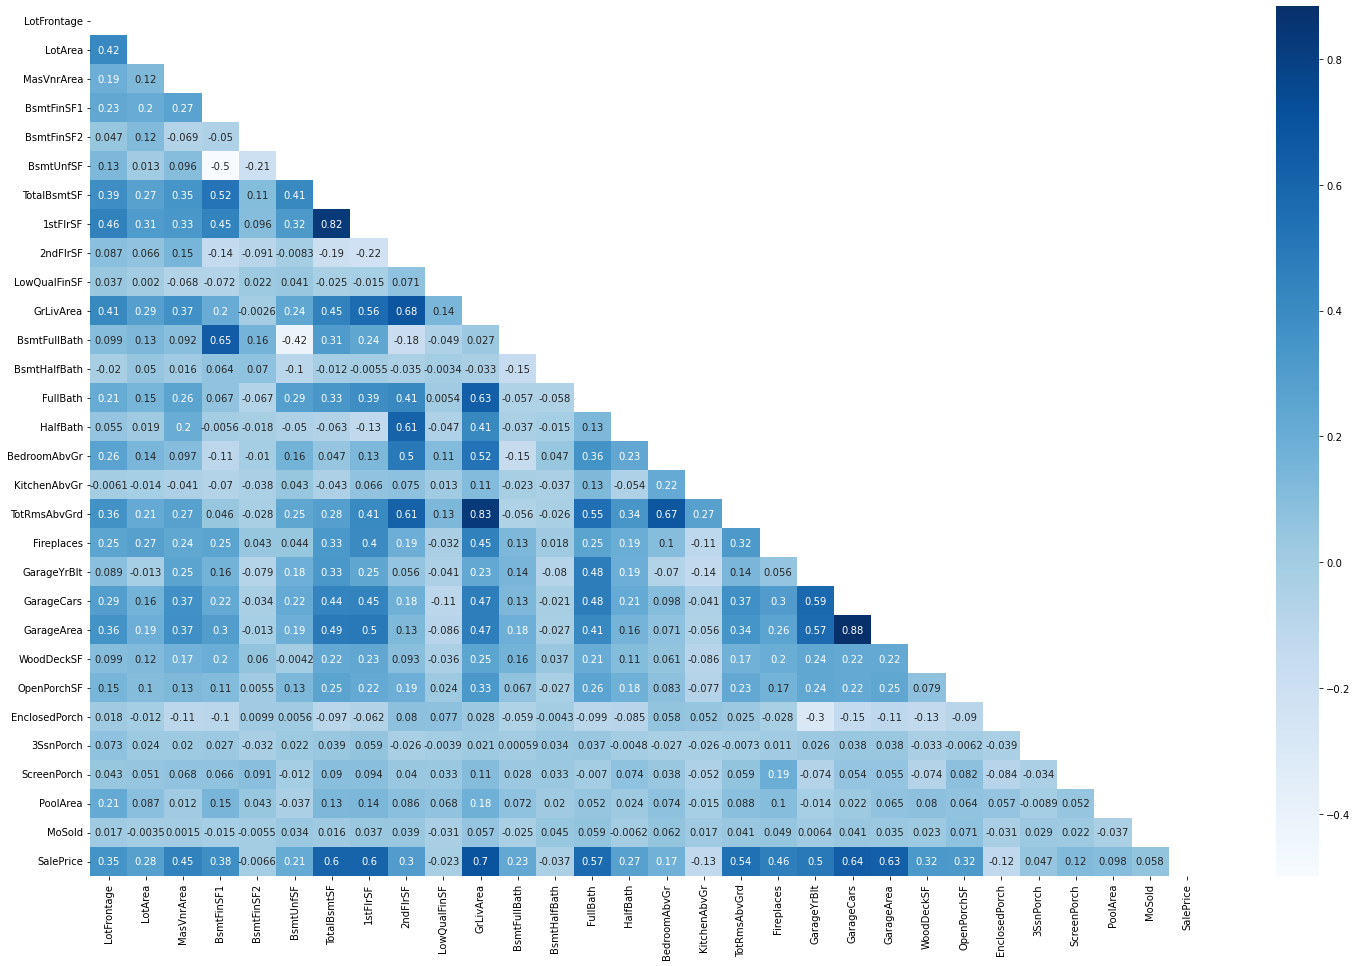

In [13]:
kenny = np.triu(np.ones_like(cor))

plt.figure(figsize=[25,16])
sns.heatmap(cor, annot=True, mask = kenny, cmap= 'Blues');

In [14]:
  #removing features with low predictive power - less correlation with the target

less_target_cols = ['BsmtFinSF1','BsmtFinType2','BsmtFinSF2','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath',
                   'KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MoSold','GarageCars','1stFlrSF','TotRmsAbvGrd',
                       'LotFrontage','LotArea','BsmtUnfSF','2ndFlrSF','GarageYrBlt','WoodDeckSF','OpenPorchSF','BedroomAbvGr','MasVnrArea']
    
_data.drop(columns = less_target_cols,inplace=True)

In [15]:
core = _data.select_dtypes('number').corr()

In [16]:
kenny = np.triu(np.ones_like(core))

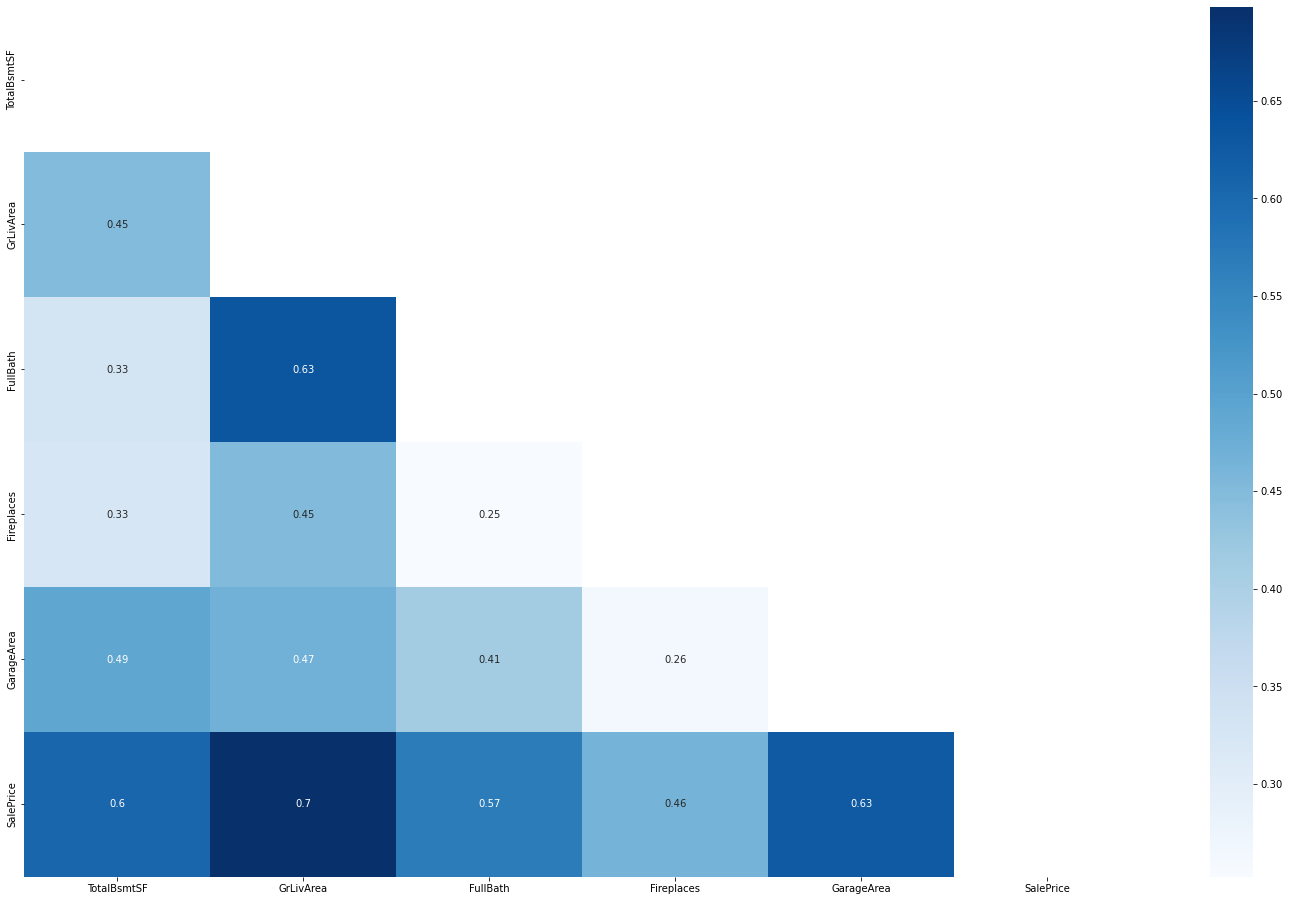

In [17]:
plt.figure(figsize=[25,16])
sns.heatmap(core, annot=True, mask = kenny, cmap= 'Blues');

In [18]:
_data.nunique()

MSSubClass       15
MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
TotalBsmtSF     686
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
GrLivArea       816
FullBath          4
KitchenQual       4
Functional        7
Fireplaces        4
GarageType        6
GarageFinish      3
GarageArea      425
GarageQual        5
GarageCond        5
PavedDrive        3
SalePrice       618
dtype: int64

In [19]:
# Removing High and Low Cardinality categorical variables in the dataset
low_cal_cols = ['Street','Utilities','CentralAir']

#drop columns
_data.drop(columns = low_cal_cols,inplace=True) 

In [29]:
cata = _data.select_dtypes('object')

In [30]:
cat= _data.select_dtypes('object')

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [38]:
cat_col = cat.columns

In [40]:
for i in cat_col:
    cata[i] = label.fit_transform(cata[i])


In [41]:
sales = _data['SalePrice']

In [42]:
from sklearn.feature_selection import chi2

In [43]:
fs = chi2(cata,sales)

In [44]:
p = fs[1]

In [45]:
pd.Series(p, index=cat.columns)

MSSubClass       2.353526e-36
MSZoning         1.000000e+00
LotShape         2.987837e-04
LandContour      1.000000e+00
LotConfig        9.905389e-01
LandSlope        3.522244e-05
Neighborhood    1.444342e-147
Condition1       1.000000e+00
Condition2       1.000000e+00
BldgType        1.315470e-116
HouseStyle       1.218540e-04
RoofStyle        1.000000e+00
RoofMatl         1.000000e+00
Exterior1st      2.122671e-01
Exterior2nd      6.548857e-05
MasVnrType       1.000000e+00
ExterQual        1.000000e+00
ExterCond        1.000000e+00
Foundation       1.000000e+00
BsmtQual         1.000000e+00
BsmtCond         1.000000e+00
BsmtExposure     1.000000e+00
BsmtFinType1     8.553531e-05
Heating          1.000000e+00
HeatingQC        5.287557e-56
Electrical       1.000000e+00
KitchenQual      1.000000e+00
Functional       1.000000e+00
GarageType       6.316520e-32
GarageFinish     9.879887e-01
GarageQual       1.000000e+00
GarageCond       1.000000e+00
PavedDrive       1.000000e+00
dtype: flo

In [47]:
_data['SalePrice'].corr(cata['Exterior1st'])

0.11039647837059001

In [48]:
_data['SalePrice'].corr(cata['Exterior2nd'])

0.11557181020001714

Remove Exterior1st column because its correlation with sale price is lesser

In [49]:
#removing the categorical columns that have low predicting power
cat_low_pred = ['MSZoning','LandContour','Condition1','Condition2','RoofStyle','RoofMatl','MasVnrType',
               'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','Heating','Electrical',
               'KitchenQual','Functional','GarageQual','GarageCond','PavedDrive','LotConfig','GarageFinish','Exterior1st']
    
_data.drop(columns=cat_low_pred, inplace=True)

In [50]:
_data.select_dtypes('object')

,MSSubClass,LotShape,LandSlope,Neighborhood,BldgType,HouseStyle,Exterior2nd,BsmtFinType1,HeatingQC,GarageType
0,60,Reg,Gtl,CollgCr,1Fam,2Story,VinylSd,GLQ,Ex,Attchd
1,20,Reg,Gtl,Veenker,1Fam,1Story,MetalSd,ALQ,Ex,Attchd
2,60,IR1,Gtl,CollgCr,1Fam,2Story,VinylSd,GLQ,Ex,Attchd
3,70,IR1,Gtl,Crawfor,1Fam,2Story,Wd Shng,ALQ,Gd,Detchd
4,60,IR1,Gtl,NoRidge,1Fam,2Story,VinylSd,GLQ,Ex,Attchd
...,...,...,...,...,...,...,...,...,...,...
1309,20,Reg,Gtl,Somerst,1Fam,1Story,VinylSd,GLQ,Ex,Attchd
1310,60,Reg,Gtl,Gilbert,1Fam,2Story,VinylSd,Unf,Ex,Attchd
1311,20,Reg,Gtl,NWAmes,1Fam,1Story,Plywood,ALQ,TA,Attchd
1312,70,Reg,Gtl,Crawfor,1Fam,2Story,CmentBd,GLQ,Ex,Attchd


In [53]:
cata.drop(columns=cat_low_pred, inplace=True)

<AxesSubplot:>

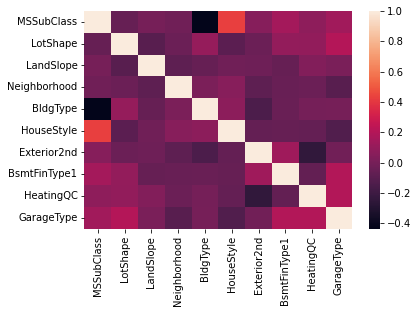

In [54]:
sns.heatmap(cata.corr())

In [55]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1314 non-null   object
 1   LotShape      1314 non-null   object
 2   LandSlope     1314 non-null   object
 3   Neighborhood  1314 non-null   object
 4   BldgType      1314 non-null   object
 5   HouseStyle    1314 non-null   object
 6   Exterior2nd   1314 non-null   object
 7   BsmtFinType1  1283 non-null   object
 8   TotalBsmtSF   1314 non-null   int64 
 9   HeatingQC     1314 non-null   object
 10  GrLivArea     1314 non-null   int64 
 11  FullBath      1314 non-null   int64 
 12  Fireplaces    1314 non-null   int64 
 13  GarageType    1241 non-null   object
 14  GarageArea    1314 non-null   int64 
 15  SalePrice     1314 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 164.4+ KB
